In [ ]:
import pylab
import numpy
from scipy.optimize import curve_fit

<ipython-input-13-949dea6fd845>:16: RuntimeWarning: invalid value encountered in power
  return (1-a*x)**b


[1.05177313 0.4595599 ]
5.4916140049998955e-09 2.9524212474835687e-08
transition_point= 0.9507753857292992


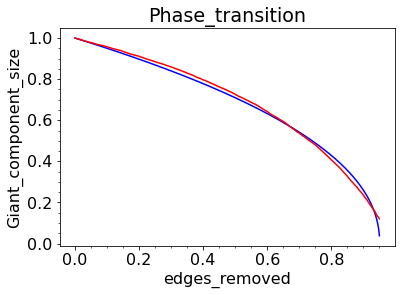

In [ ]:
x,y=pylab.loadtxt('andamento.txt',unpack=True) #file definito nel notebook "Network_resilience"
Dx=0.001
Dy=0.001
pylab.rc('font',size=16)
pylab.xlabel('edges_removed')
pylab.ylabel('Giant_component_size')
pylab.title('Phase_transition')
pylab.minorticks_on()

init=(1,0.5)

x2 = x[x<0.95]
y2 = y[x<0.95]

def f(x, a, b):
    return (1-a*x)**b

par,cov=curve_fit(f,x2,y2,init, maxfev=1000)
print(par)
print(cov[0,0], cov[1,1])
print("transition_point=", 1/par[0]) #f(x)=0 => x=1/a

pylab.plot(x2,f(x2,par[0],par[1]), color='blue')
pylab.plot(x2,y2, color='red')

pylab.show()             

In [ ]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import numpy as np
import powerlaw

In [ ]:
%run Utilyties.ipynb

In [ ]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  28068
* TOT Reply =  3000




In [ ]:
N=G.number_of_nodes()
L=G.number_of_edges()
print("Il numero di nodi è", N,"\nIl numero di link è", L)
theoretical_transition_point=1-N/(2*L)
print("Il punto di transizione teorico è", theoretical_transition_point)

Il numero di nodi è 16675 
Il numero di link è 52373
Il punto di transizione teorico è 0.8408053768162984
